# 1. Install and Import Dependencies

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [4]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\ahmed/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-12-20 Python-3.10.4 torch-2.1.2+cpu CPU

100%|██████████| 14.1M/14.1M [00:03<00:00, 3.76MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [8]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [17]:
img = 'data\images\image_8_label_1.png'


In [52]:
result = model(img)
result.print()

image 1/1: 288x432 (no detections)
Speed: 5.6ms pre-process, 73.1ms inference, 0.0ms NMS per image at shape (1, 3, 448, 640)


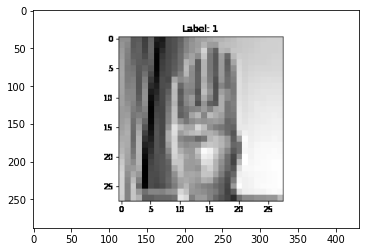

In [19]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

# 5. Train from scratch

In [15]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [16]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [54]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\ahmed\Desktop\deep-learning': No such file or directory
YOLOv5  2023-12-23 Python-3.10.4 torch-2.1.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t

# 6. Load Custom Model

In [2]:
model_custom = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\ahmed/.cache\torch\hub\master.zip
YOLOv5  2023-12-24 Python-3.10.4 torch-2.1.2+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7115308 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 


In [49]:
# import os
# img = os.path.join('data', 'images', 'image_117_label_23.png')

img = 'data\images\image_8_label_1.png'

In [50]:
results = model_custom(img)

In [51]:
results.print()

image 1/1: 288x432 1 b
Speed: 6.3ms pre-process, 84.6ms inference, 0.0ms NMS per image at shape (1, 3, 448, 640)


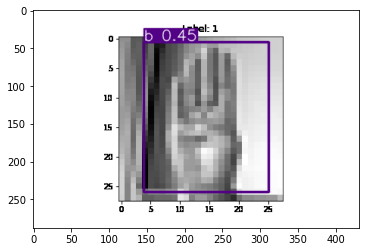

In [52]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [77]:
# cap = cv2.VideoCapture(0)
# while cap.isOpened():
#     ret, frame = cap.read()
    
#     # Make detections 
#     results = model(frame)
    
#     cv2.imshow('YOLO', np.squeeze(results.render()))
    
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()